In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

<h1>Análise de corretude do algoritmo</h1>

In [2]:
wd = str(Path('..').resolve())
print(wd)

/home/belos/Documents/ContaminantDiffusionCuda


In [3]:
range_one = [64, 128, 256, 512, 1024, 2048]
range_two = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
different_iterations = []

In [4]:
for i in range_one:
    for j in range_two:
        cuda_matriz = pd.read_csv(wd + '/results/cuda/matriz/' + str(i) + '_' + str(j) + '.csv')
        sequencial_matriz = pd.read_csv(wd + '/results/seq/matriz/' + str(i) + '_' + str(j) + '.csv')
        cuda_diff = pd.read_csv(wd + '/results/cuda/diff/' + str(i) + '_' + str(j) + '.csv')
        sequencial_diff = pd.read_csv(wd + '/results/seq/diff/' + str(i) + '_' + str(j) + '.csv')
        if(not(cuda_matriz.equals(sequencial_matriz))or not(sequencial_matriz.equals(cuda_matriz))):
            different_iterations.append(['matriz', i, j])
        if(not(cuda_diff.equals(sequencial_diff))or not(sequencial_diff.equals(cuda_diff))):
            different_iterations.append(['diff', i, j])
if len(different_iterations) == 0:
    print("O resultado foi o mesmo para todas as iterações do sequencial e do paralelo")
else:
    print("As seguintes iterações apresentaram as seguintes diferenças")
    print(different_iterations)

O resultado foi o mesmo para todas as iterações do sequencial e do paralelo


<h1>Análise de tempo</h1>

In [9]:
time_cuda = pd.DataFrame(np.genfromtxt(wd+'/results/cuda/time.csv', delimiter=','), columns=['Matriz', 'Iteracoes', 'Tempo'])
time_cuda

,Matriz,Iteracoes,Tempo
0,64.0,2.0,0.000266
1,64.0,4.0,0.000254
2,64.0,8.0,0.000299
3,64.0,16.0,0.000460
4,64.0,32.0,0.000576
...,...,...,...
61,2048.0,128.0,1.307780
62,2048.0,256.0,2.686340
63,2048.0,512.0,5.254760
64,2048.0,1024.0,10.665200


In [26]:
time_sequencial = pd.DataFrame(np.genfromtxt(wd+'/results/seq/time.csv', delimiter=','), columns=['Matriz', 'Iteracoes', 'Tempo'])
time_sequencial

,Matriz,Iteracoes,Tempo
55,2048.0,2.0,0.279206
56,2048.0,4.0,0.547155
57,2048.0,8.0,1.128170
58,2048.0,16.0,2.499340
59,2048.0,32.0,6.259310
60,2048.0,64.0,10.150800
61,2048.0,128.0,20.276800
62,2048.0,256.0,41.103200
63,2048.0,512.0,78.118800
64,2048.0,1024.0,107.902000


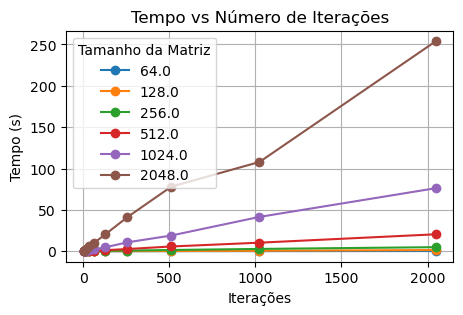

In [33]:
df_pivot = time_sequencial.pivot(index='Iteracoes', columns='Matriz', values='Tempo')
# Plotar o gráfico
df_pivot.plot(kind='line', marker='o', figsize=(5, 3), title="Tempo vs Número de Iterações")
plt.xlabel("Iterações")  # Rótulo do eixo x
plt.ylabel("Tempo (s)")  # Rótulo do eixo y
plt.grid(True)  # Adicionar grade para melhor visualização
plt.legend(title="Tamanho da Matriz")  # Adicionar legenda
plt.show()

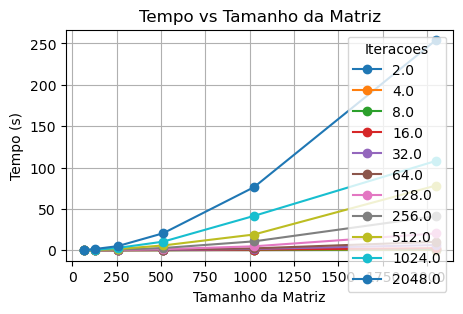

In [34]:
df_pivot = time_sequencial.pivot(index='Matriz', columns='Iteracoes', values='Tempo')
# Plotar o gráfico
df_pivot.plot(kind='line', marker='o', figsize=(5, 3), title="Tempo vs Tamanho da Matriz")
plt.xlabel("Tamanho da Matriz")  # Rótulo do eixo x
plt.ylabel("Tempo (s)")  # Rótulo do eixo y
plt.grid(True)  # Adicionar grade para melhor visualização
plt.legend(title="Iteracoes")  # Adicionar legenda
plt.show()

In [36]:
tempo = time_sequencial.merge(time_cuda, how='inner', on=['Matriz', 'Iteracoes'])
tempo["Speedup"] = tempo["Tempo_x"]/tempo["Tempo_y"]
tempo

,Matriz,Iteracoes,Tempo_x,Tempo_y,Speedup
0,64.0,2.0,0.000595,0.000266,2.236842
1,64.0,4.0,0.000723,0.000254,2.846457
2,64.0,8.0,0.001248,0.000299,4.173913
3,64.0,16.0,0.002830,0.000460,6.152174
4,64.0,32.0,0.005661,0.000576,9.828125
...,...,...,...,...,...
61,2048.0,128.0,20.276800,1.307780,15.504749
62,2048.0,256.0,41.103200,2.686340,15.300818
63,2048.0,512.0,78.118800,5.254760,14.866293
64,2048.0,1024.0,107.902000,10.665200,10.117204
